# SIFT Feature Extraction

SIFT (Scale-Invariant Feature Transform) detects important points, called **keypoints**, in an image. These
keypoints represent distinct and unique features, such as corners or edges, that can be identified even if the image is resized, rotated, or transformed. SIFT generates a **descriptor** for each keypoint, which helps in matching these points across images.

The code first loads the image, converts it to grayscale (because many feature detectors work better on grayscale images), and then uses the SIFT algorithm to detect keypoints. The keypoints are visualized on the image.

## Key Points

- **Keypoints** are important image features.
- **Descriptors** are used to describe and match these keypoints.

## Task 1: SIFT

1. Load an image of your choice.
2. Use the **SIFT (Scale-Invariant Feature Transform)** algorithm to detect and compute keypoints and
descriptors in the image.
3. Visualize the keypoints on the image and display the result.

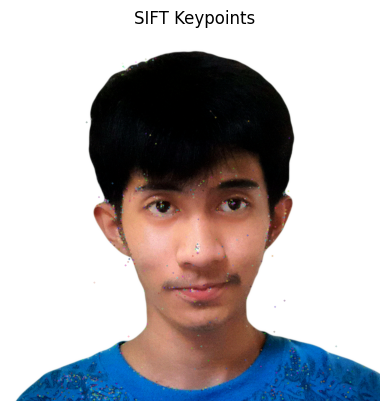

Number of keypoints detected: 938


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/Orencia.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# SURF Feature Extraction

SURF (Speeded-Up Robust Features) is similar to SIFT but is optimized for speed. SURF focuses on finding features faster, making it useful for real-time applications. It also detects keypoints and generates descriptors but uses a different mathematical approach to SIFT.

In the code, SURF is used to detect keypoints in a grayscale image, and the keypoints are visualized
similarly to SIFT. The performance of SURF is usually faster than SIFT, but it might miss certain keypoints
that SIFT would detect.

## Key Points

- SURF is faster than SIFT.
- It can be a good choice for real-time applications

## Task 2: SURF

1. Load a different image (or the same one).
2. Apply the **SURF (Speeded-Up Robust Features)** algorithm to detect and compute keypoints and
descriptors.
3. Visualize and display the keypoints.

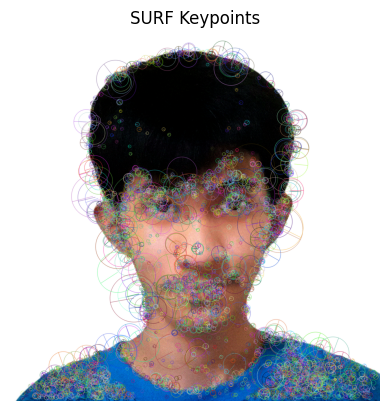

Number of keypoints detected: 4080


In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/Orencia.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SURF Keypoints")
plt.axis('off')
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# ORB Feature Extraction

ORB (Oriented FAST and Rotated BRIEF) is a feature detection algorithm that is both fast and computationally less expensive than SIFT and SURF. It is ideal for real-time applications, particularly in mobile devices. ORB combines two methods: **FAST (Features from Accelerated Segment Test)** to detect keypoints and **BRIEF (Binary Robust Independent Elementary Features)** to compute descriptors.

The code uses ORB to detect keypoints and display them on the image. Unlike SIFT and SURF, ORB is more focused on speed and efficiency, which makes it suitable for applications that need to process images quickly.

## Key Points
- ORB is a fast alternative to SIFT and SURF.
- It's suitable for real-time and resource-constrained environments.

## Task 3: ORB

1. Apply the ORB **(Oriented FAST and Rotated BRIEF)** algorithm to detect keypoints and compute
descriptors on another image.
2. Visualize and display the keypoints.

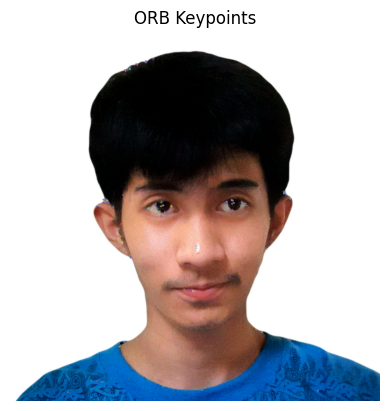

Number of keypoints detected: 500


In [46]:
# Load the image
image = cv2.imread("/content/Orencia.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the imgae
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints")
plt.axis('off')
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

# Feature Matching using SIFT

In this, **feature matching** is used to find similar points between two images. After detecting keypoints using SIFT, the algorithm uses a **Brute-Force Matcher** to find matching keypoints between two images. The matcher compares the descriptors of the keypoints and finds pairs that are similar.

In the code, we load two images, detect their keypoints and descriptors using SIFT, and then use the matcher to draw lines between matching keypoints. The lines show which points in the first image correspond to points in the second image.

## Key Points
- Feature matching helps compare and find similarities between two images
- The **Brute-Force Matcher** finds the closest matching descriptors

## Task 4: Feature Matching

1. Using the keypoints and descriptors obtained from the previous tasks (e.g., SIFT, SURF, or ORB), match the features between two different images using **Brute-Force Matching** or **FLANN (Fast Library for Approximate Nearest Neighbors)**.
2. Display the matched keypoints on both images.

Number of matches: 258


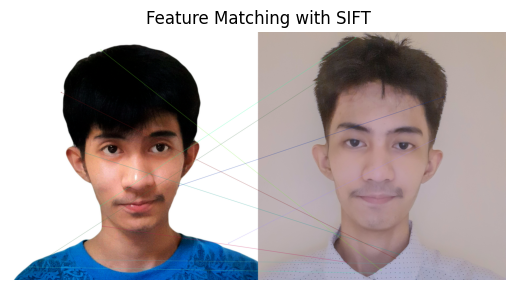

In [47]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread("/content/Orencia.png")
image2 = cv2.imread("/content/Orencia.jpg")

# Resize both images to the same size (use the size of the smaller image)
height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]

# Determine the new size (smallest height and width of both images)
new_height = min(height1, height2)
new_width = min(width1, width2)

# Resize both images
image1_resized = cv2.resize(image1, (new_width, new_height))
image2_resized = cv2.resize(image2, (new_width, new_height))

# Initialize SIFT Detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1_resized, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2_resized, None)

# Initialize the Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Print the number of matches
print(f"Number of matches: {len(matches)}")

# Sort matches by distance (Best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
image_matches = cv2.drawMatches(image1_resized, keypoints1, image2_resized, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the image with matches
plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title("Feature Matching with SIFT")
plt.axis('off')
plt.show()

# Real-World Applications (Image Stitching using Homography)

In this, you will use matched keypoints from two images to align or "stitch" them together. Homography
is a mathematical transformation that maps points from one image to another, which is useful for aligning images taken from different angles or perspectives. This process is used in image stitching (e.g., creating
panoramas), where you align and merge images to form a larger one.

The code uses the keypoints matched between two images and calculates the homography matrix. This matrix is then used to warp one image to align it with the other.

## Key Points

- **Homography** is used to align images
- This is useful in applications like panoramic image creation or object recognition.

## Task 5: Applications of Feature Matching

1. Apply feature matching to two images of the same scene taken from different angles or
perspectives.
2. Use the matched features to align the images (e.g., using **homography** to warp one image onto
another).

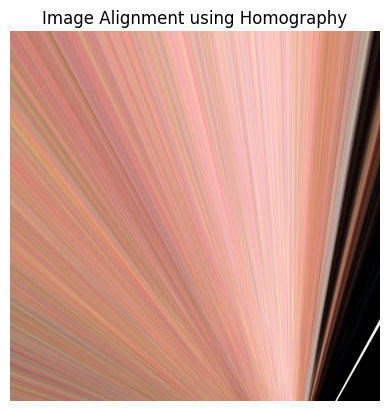

In [48]:
# Load the two images
image1 = cv2.imread("/content/Orencia.png")
image2 = cv2.imread("/content/Orencia.jpg")

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
  if m.distance < 0.75 * n.distance:
    good_matches.append(m)

# Extract location of good matches
src_pts = np.float32(
  [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1, 1, 2)
dst_pts = np.float32(
  [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to align with image2
h, w = image1.shape[:2]
result = cv2.warpPerspective(image1, M, (w, h))

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Image Alignment using Homography")
plt.axis('off')
plt.show()

# Combining SIFT and ORB

By combining two feature extraction methods (SIFT and ORB), you can take advantage of the strengths of both. For example, SIFT is more accurate, but ORB is faster. By detecting keypoints using both methods, you can compare how they perform on different types of images and possibly combine their outputs for more robust feature detection and matching.

In the code, we extract keypoints from two images using both SIFT and ORB, and then you can use a matcher to compare and match the features detected by both methods.

## Key Point

- Combining methods can improve performance in some applications.
- SIFT is accurate, while ORB is fast, making them complementary in certain tasks.

## Task 6: Combining Feature Extraction Methods

1. Combine multiple feature extraction methods (e.g., SIFT + ORB) to extract features and match them between two images.
2. Display the combined result.

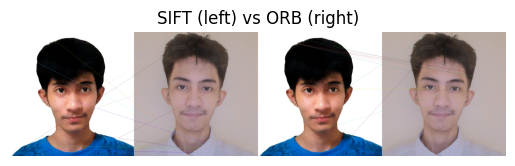

Number of SIFT matches: 258
Number of ORB matches: 89


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread("/content/Orencia.png")
image2 = cv2.imread("/content/Orencia.jpg")

# Resize both images to the same size (smallest of both)
height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]
new_height = min(height1, height2)
new_width = min(width1, width2)
image1_resized = cv2.resize(image1, (new_width, new_height))
image2_resized = cv2.resize(image2, (new_width, new_height))

# SIFT Detector
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1_resized, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2_resized, None)

# ORB Detector
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1_resized, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2_resized, None)

# Initialize the Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors for SIFT
matches_sift = bf.match(descriptors1_sift, descriptors2_sift)

# Use a different matcher for ORB (since ORB uses binary descriptors)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)

# Sort matches by distance (Best matches first)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Draw the top matches from both methods
image_matches_sift = cv2.drawMatches(image1_resized, keypoints1_sift, image2_resized, keypoints2_sift, matches_sift[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
image_matches_orb = cv2.drawMatches(image1_resized, keypoints1_orb, image2_resized, keypoints2_orb, matches_orb[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Combine the two results into one for visualization
image_combined = np.hstack((image_matches_sift, image_matches_orb))

# Display the combined image
plt.imshow(cv2.cvtColor(image_combined, cv2.COLOR_BGR2RGB))
plt.title("SIFT (left) vs ORB (right)")
plt.axis('off')
plt.show()

# Print the number of matches for each method
print(f"Number of SIFT matches: {len(matches_sift)}")
print(f"Number of ORB matches: {len(matches_orb)}")

# Overall Understanding

- **SIFT** is accurate for detecting and matching keypoints even in transformed images (scaled,
rotated).
- **SURF** is faster than SIFT but still effective for keypoint detection.
- **ORB** is highly efficient and suited for real-time applications.
- **Feature Matching** is essential in comparing different images to find common objects or align
them.
- **Homography** is used in aligning images, such as stitching images together to form a panorama

In [50]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Exercise 2 - Feature Extraction Methods.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Exercise 2 - Feature Extraction Methods.ipynb to pdf
[NbConvertApp] Support files will be in Exercise 2 - Feature Extraction Methods_files/
[NbConvertApp] Making directory ./Exercise 2 - Feature Extraction Methods_files
[NbConvertApp] Writing 52862 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 848818 bytes to /content/drive/MyDrive/Colab Notebooks/Exercise 2 - Feature Extraction Methods.pdf
